Documentul s-a generat cu succes si salvat la: fisiere_client\crime_rates_report.docx
Fisier trimis cu succes.


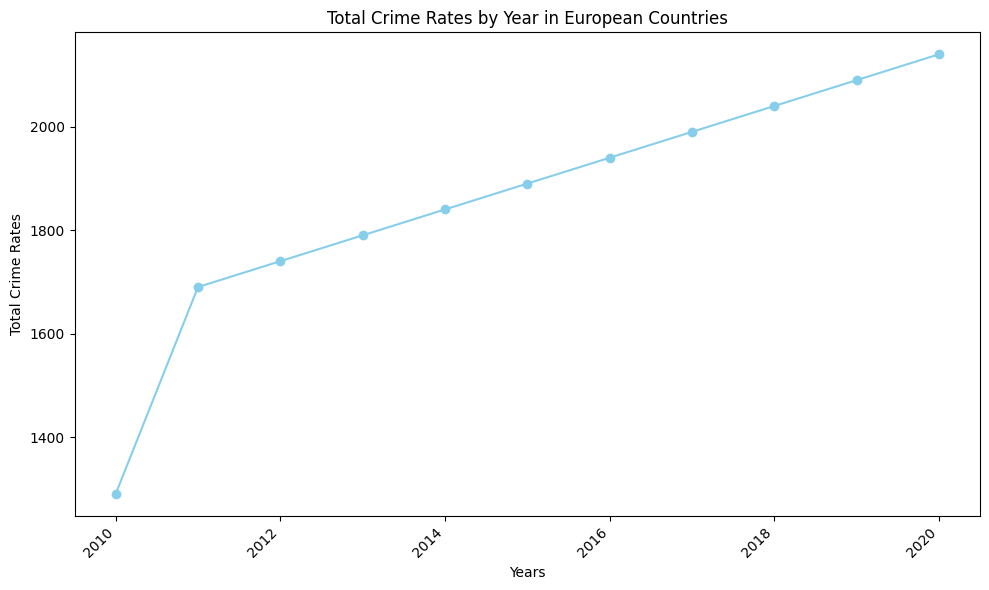

In [1]:
import tkinter as tk
from tkinter import filedialog
import csv
import matplotlib.pyplot as plt
from collections import defaultdict
from docx import Document
from docx.shared import Inches
import os
import socket

class ClientGUI:
    def __init__(self, master):
        self.master = master
        self.master.title("Aplicatie")

        self.button_frame = tk.Frame(master)
        self.button_frame.pack()

        self.open_button = tk.Button(self.button_frame, text="Deschide CSV", command=self.open_csv)
        self.open_button.grid(row=0, column=0, padx=10, pady=10)

        self.process_plot_button = tk.Button(self.button_frame, text="Proceseaza si Afiseaza Data", command=self.process_and_plot_data)
        self.process_plot_button.grid(row=0, column=1, padx=10, pady=10)

        self.generate_send_button = tk.Button(self.button_frame, text="Genereaza si Trimite Data", command=self.generate_and_send_docx)
        self.generate_send_button.grid(row=0, column=2, padx=10, pady=10)

        self.plot_frame = tk.Frame(master)
        self.plot_frame.pack()

    def open_csv(self):
        file_path = filedialog.askopenfilename(filetypes=[("CSV files", "*.csv")])
        if file_path:
            self.csv_file = file_path

    def process_and_plot_data(self):
        try:
            if not hasattr(self, 'csv_file'):
                self.open_csv()

            with open(self.csv_file, 'r') as file:
                csv_reader = csv.reader(file)
                data = list(csv_reader)

            data_dict = defaultdict(list)
            for row in data[1:]:
                year = int(row[1])  # Anul e coloana 2
                crime_rate = float(row[2])  # Rata criminalitatii e coloana 3
                data_dict[year].append(crime_rate)

            years = list(data_dict.keys())
            total_crime_rates = [sum(data_dict[year]) for year in years]

            plt.figure(figsize=(10, 6))
            plt.plot(years, total_crime_rates, marker='o', color='skyblue', linestyle='-')
            plt.xlabel('Years')
            plt.ylabel('Total Crime Rates')
            plt.title('Total Crime Rates by Year in European Countries')
            plt.xticks(rotation=45, ha='right')
            plt.tight_layout()

            plt.savefig('total_crime_rates_plot.png')  # Salvam plotarea
            self.plot_image = tk.PhotoImage(file='total_crime_rates_plot.png')
            plot_label = tk.Label(self.plot_frame, image=self.plot_image)
            plot_label.pack()

        except AttributeError:
            print("Selectati un CSV.")

    def generate_and_send_docx(self):
        try:
            docx_file_path = self.generate_docx()
            if docx_file_path:
                self.send_file(docx_file_path)
        except AttributeError:
            print("Mai intai generati un DOCX.")

    def generate_docx(self):
        try:
            if not hasattr(self, 'csv_file'):
                self.open_csv()
            if not hasattr(self, 'plot_image'):
                self.process_and_plot_data()

            document = Document()
            document.add_heading('Crime Rates Report', level=1)
            document.add_paragraph('Acesta este un raport al ratei criminalitatii in tarile din Europa.')

            # Adaugam tabelul cu date din CSV
            table = document.add_table(rows=1, cols=3)
            hdr_cells = table.rows[0].cells
            hdr_cells[0].text = 'Tara'
            hdr_cells[1].text = 'Anul'
            hdr_cells[2].text = 'Rata Criminalitatii'

            with open(self.csv_file, 'r') as file:
                csv_reader = csv.reader(file)
                next(csv_reader)  # Skip header row
                for row in csv_reader:
                    row_cells = table.add_row().cells
                    row_cells[0].text = row[0]
                    row_cells[1].text = row[1]
                    row_cells[2].text = row[2]

            # Adaugam imaginea de plotare
            document.add_picture('total_crime_rates_plot.png', width=Inches(5))

            # Specificam directorul unde salvam
            output_dir = 'fisiere_client'
            os.makedirs(output_dir, exist_ok=True)

            # Salvare
            docx_file_path = os.path.join(output_dir, 'crime_rates_report.docx')
            document.save(docx_file_path)

            print("Documentul s-a generat cu succes si salvat la:", docx_file_path)

            return docx_file_path

        except AttributeError:
            print("Mai intai selecteaza un fisier CSV si proceseaza-l.")

    def send_file(self, file_path):
        HOST = '127.0.0.1'  # IP-ul serverului
        PORT = 65432        # Port-ul

        with socket.socket(socket.AF_INET, socket.SOCK_STREAM) as s:
            s.connect((HOST, PORT))
            with open(file_path, 'rb') as f:
                while True:
                    data = f.read(1024)
                    if not data:
                        break
                    s.sendall(data)
            print("Fisier trimis cu succes.")

def main():
    root = tk.Tk()
    app = ClientGUI(root)
    root.mainloop()

if __name__ == "__main__":
    main()
